# This script contains the following:

1. Importing your libraries and data

2. Subsetting data

3. Time series analysis and plot of autocorrelations

   3.1 Time series analysis "n_victims"

   3.2 Time series analysis  " n_killed"

   3.3 Time series analysis  "n_arrested"

   3.4 Time series analysis  "n_suspects"

### 1. Importing libraries and data

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [5]:
# Importing data

path = r'/Users/nhungphamthi/Documents/data analytis/Achievement 6'
df_gun_violence = pd.read_csv(os.path.join(path, 'cleaned_gunviolence.csv'), index_col = False)

In [7]:
# the date is string, so I seperate year and month and add more columns of year and month based on columns date.

df_gun_violence['year_month']= df_gun_violence['date'].str[0:7]

df_gun_violence = df_gun_violence.astype({
    'n_killed': 'float64', 
    'n_injured': 'float64',
    'n_guns_involved': 'float64', 
    'n_victims': 'float64', 
    'n_suspects': 'float64',
    'n_unharmed': 'float64',
    'n_arrested': 'float64'})
    
df_gun_violence.head()

,Unnamed: 0,incident_id,date,state,n_killed,n_injured,n_guns_involved,n_victims,n_suspects,n_unharmed,n_arrested,year_month
0,0,461105,2013-01-01,Pennsylvania,0.0,4.0,0.0,4.0,1.0,0.0,1.0,2013-01
1,1,460726,2013-01-01,California,1.0,3.0,0.0,4.0,1.0,0.0,0.0,2013-01
2,2,478855,2013-01-01,Ohio,1.0,3.0,2.0,3.0,2.0,2.0,2.0,2013-01
3,3,478925,2013-01-05,Colorado,4.0,0.0,0.0,3.0,1.0,0.0,0.0,2013-01
4,4,478959,2013-01-07,North Carolina,2.0,2.0,2.0,3.0,1.0,0.0,0.0,2013-01


In [9]:
df_gun_violence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       239677 non-null  int64  
 1   incident_id      239677 non-null  int64  
 2   date             239677 non-null  object 
 3   state            239677 non-null  object 
 4   n_killed         239677 non-null  float64
 5   n_injured        239677 non-null  float64
 6   n_guns_involved  239677 non-null  float64
 7   n_victims        239677 non-null  float64
 8   n_suspects       239677 non-null  float64
 9   n_unharmed       239677 non-null  float64
 10  n_arrested       239677 non-null  float64
 11  year_month       239677 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 21.9+ MB


In [11]:
df_gun_violence['year_month'] = pd.to_datetime(df_gun_violence['year_month'])

In [13]:
df_gun_violence.shape

(239677, 12)

In [15]:
df_gun_violence.head()

,Unnamed: 0,incident_id,date,state,n_killed,n_injured,n_guns_involved,n_victims,n_suspects,n_unharmed,n_arrested,year_month
0,0,461105,2013-01-01,Pennsylvania,0.0,4.0,0.0,4.0,1.0,0.0,1.0,2013-01-01
1,1,460726,2013-01-01,California,1.0,3.0,0.0,4.0,1.0,0.0,0.0,2013-01-01
2,2,478855,2013-01-01,Ohio,1.0,3.0,2.0,3.0,2.0,2.0,2.0,2013-01-01
3,3,478925,2013-01-05,Colorado,4.0,0.0,0.0,3.0,1.0,0.0,0.0,2013-01-01
4,4,478959,2013-01-07,North Carolina,2.0,2.0,2.0,3.0,1.0,0.0,0.0,2013-01-01


### 2. Subsetting time-series data. 

In [109]:
# Group by 'year' and calculate the mean value for each date
df_victims= df_gun_violence.groupby('year_month')['n_victims'].mean().reset_index()
df_killed = df_gun_violence.groupby('year_month')['n_killed'].mean().reset_index()
df_suspects = df_gun_violence.groupby('year_month')['n_suspects'].mean().reset_index()
df_arrested = df_gun_violence.groupby('year_month')['n_arrested'].mean().reset_index()

### 3. Time series analysis

#### 3.1 Time series analysis "n_victims"

In [19]:
df_victims

,year_month,n_victims
0,2013-01-01,4.200000
1,2013-02-01,4.666667
2,2013-03-01,5.157895
3,2013-04-01,4.529412
4,2013-05-01,4.370370
...,...,...
58,2017-11-01,0.720741
59,2017-12-01,0.704241
60,2018-01-01,0.704425
61,2018-02-01,0.642095


In [21]:
df_victims.head()

,year_month,n_victims
0,2013-01-01,4.200000
1,2013-02-01,4.666667
2,2013-03-01,5.157895
3,2013-04-01,4.529412
4,2013-05-01,4.370370


In [23]:
df_victims.describe()

,year_month,n_victims
count,63,63.000000
mean,2015-08-01 12:57:08.571428608,1.523107
min,2013-01-01 00:00:00,0.623106
25%,2014-04-16 00:00:00,0.753853
50%,2015-08-01 00:00:00,0.810486
75%,2016-11-16 00:00:00,0.981101
max,2018-03-01 00:00:00,5.285714
std,NaN,1.510355


In [25]:
# Set the "year_month" column as the index

from datetime import datetime

df_victims['datetime'] = pd.to_datetime(df_victims['year_month']) # Create a datetime column from "date"
df_victims = df_victims.set_index('datetime') # Set the datetime as the index of the dataframe
df_victims.drop(['year_month'], axis=1, inplace=True) # Drop the "date" column
df_victims.head()

,n_victims
datetime,
2013-01-01,4.200000
2013-02-01,4.666667
2013-03-01,5.157895
2013-04-01,4.529412
2013-05-01,4.370370


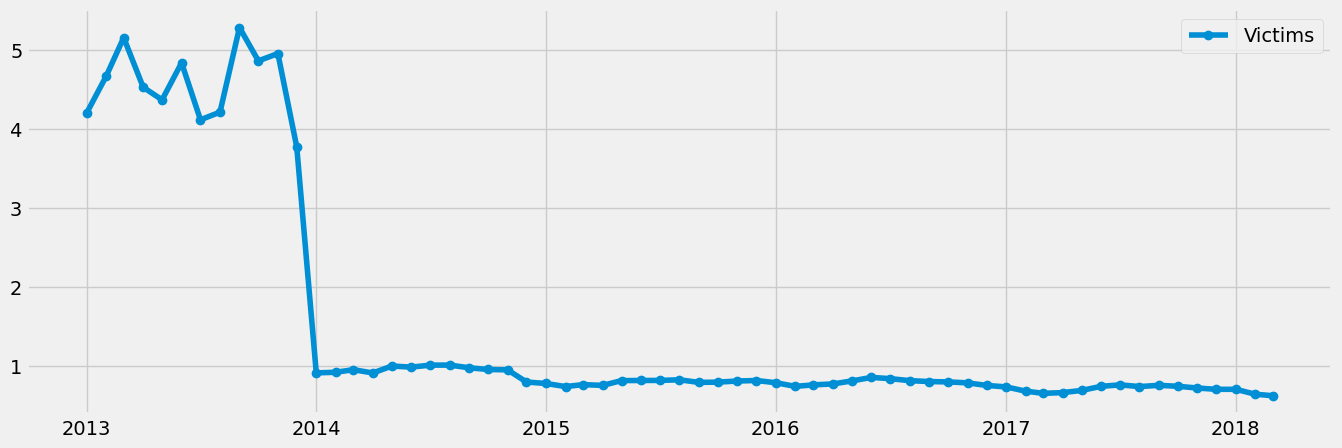

In [27]:
# Plot the data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_victims, marker='o', linestyle='-', label='Victims')
plt.legend()
plt.show()

In [29]:
# Conduct a Dickey-Fuller test to check for stationarity

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

In [31]:
# Apply the test on the time series
dickey_fuller(df_victims['n_victims'])

Dickey-Fuller Stationarity Test:
Test Statistic                -1.081642e+01
p-value                        1.852287e-19
Number of Lags Used            1.000000e+01
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


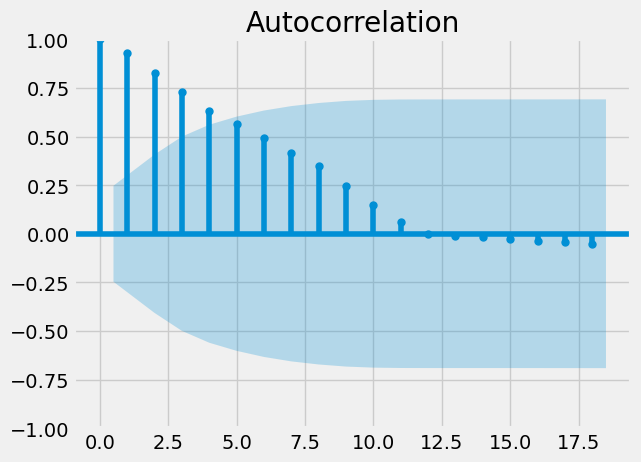

In [33]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here to import the autocorrelation and partial correlation plots

plot_acf(df_victims)
plt.show()

time series is stationary.

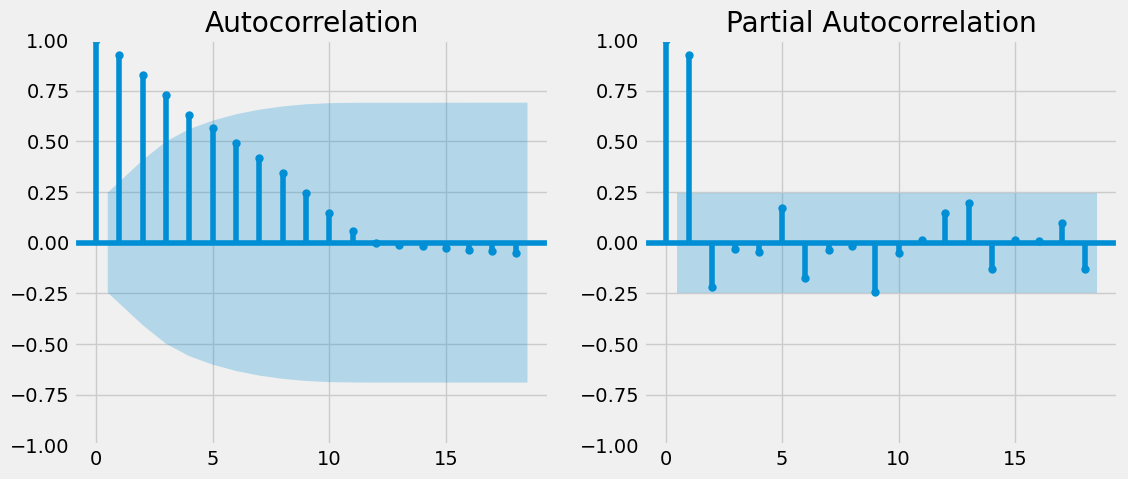

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plot_acf(df_victims['n_victims'].dropna(), ax=axes[0])   # ACF for MA(q)
plot_pacf(df_victims['n_victims'].dropna(), ax=axes[1])  # PACF for AR(p)
plt.show()

#### 3.2 Time series analysis decomposition "n_killed"

In [37]:
df_killed.head()

,year_month,n_killed
0,2013-01-01,1.533333
1,2013-02-01,1.166667
2,2013-03-01,1.315789
3,2013-04-01,1.529412
4,2013-05-01,0.740741


In [39]:
df_killed.describe()

,year_month,n_killed
count,63,63.000000
mean,2015-08-01 12:57:08.571428608,0.429761
min,2013-01-01 00:00:00,0.200515
25%,2014-04-16 00:00:00,0.245861
50%,2015-08-01 00:00:00,0.258237
75%,2016-11-16 00:00:00,0.279295
max,2018-03-01 00:00:00,1.533333
std,NaN,0.384454


In [41]:
# Set the "year_month" column as the index
df_killed['datetime'] = pd.to_datetime(df_killed['year_month']) # Create a datetime column from "date"
df_killed = df_killed.set_index('datetime') # Set the datetime as the index of the dataframe
df_killed.drop(['year_month'], axis=1, inplace=True) # Drop the "date" column
df_killed.head()

,n_killed
datetime,
2013-01-01,1.533333
2013-02-01,1.166667
2013-03-01,1.315789
2013-04-01,1.529412
2013-05-01,0.740741


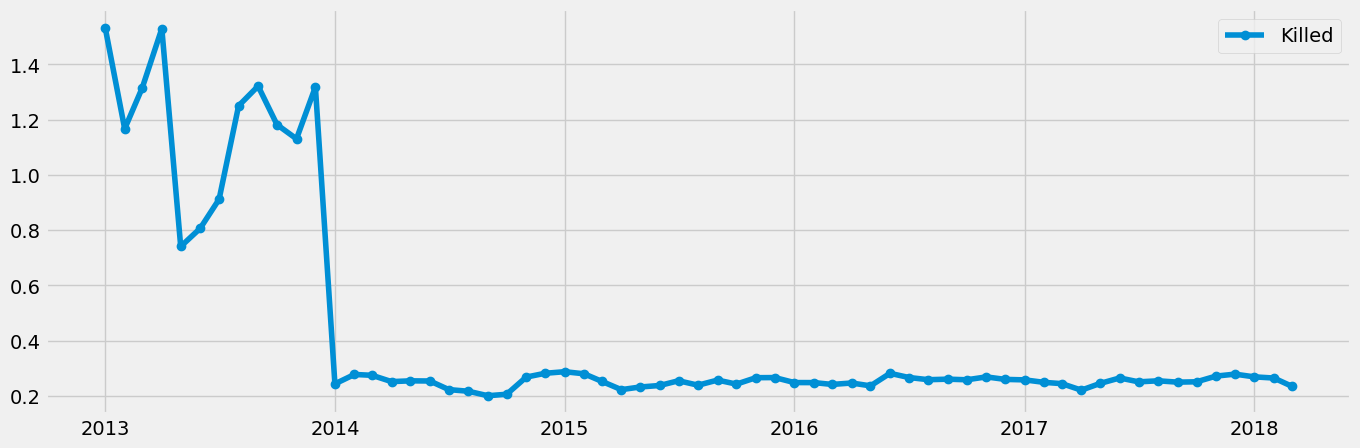

In [43]:
# Plot the data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_killed, marker='o', linestyle='-', label='Killed')
plt.legend()
plt.show()

In [45]:
# Conduct a Dickey-Fuller test to check for stationarity
dickey_fuller(df_killed['n_killed'])

Dickey-Fuller Stationarity Test:
Test Statistic                -47.740754
p-value                         0.000000
Number of Lags Used            11.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


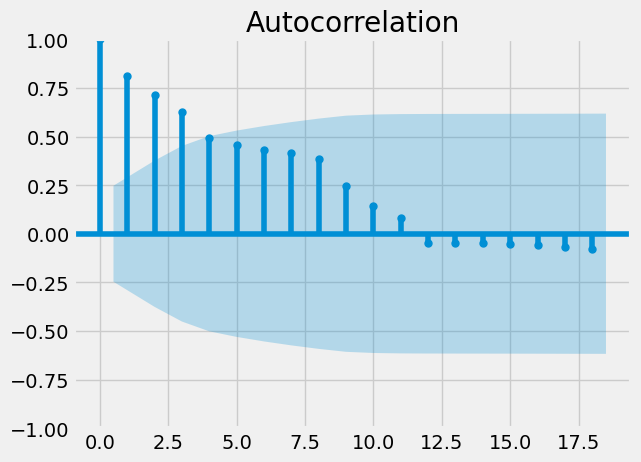

In [47]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here to import the autocorrelation and partial correlation plots

plot_acf(df_killed)
plt.show()

#### 3.3 Time series analysis decomposition "n_arrested"

In [113]:
df_arrested.head()

,year_month,n_arrested
0,2013-01-01,0.533333
1,2013-02-01,1.000000
2,2013-03-01,1.000000
3,2013-04-01,0.823529
4,2013-05-01,0.518519


In [115]:
# Set the "year_month" column as the index
df_arrested['datetime'] = pd.to_datetime(df_arrested['year_month']) # Create a datetime column from "date"
df_arrested = df_arrested.set_index('datetime') # Set the datetime as the index of the dataframe
df_arrested.drop(['year_month'], axis=1, inplace=True) # Drop the "date" column
df_arrested.head()

,n_arrested
datetime,
2013-01-01,0.533333
2013-02-01,1.000000
2013-03-01,1.000000
2013-04-01,0.823529
2013-05-01,0.518519


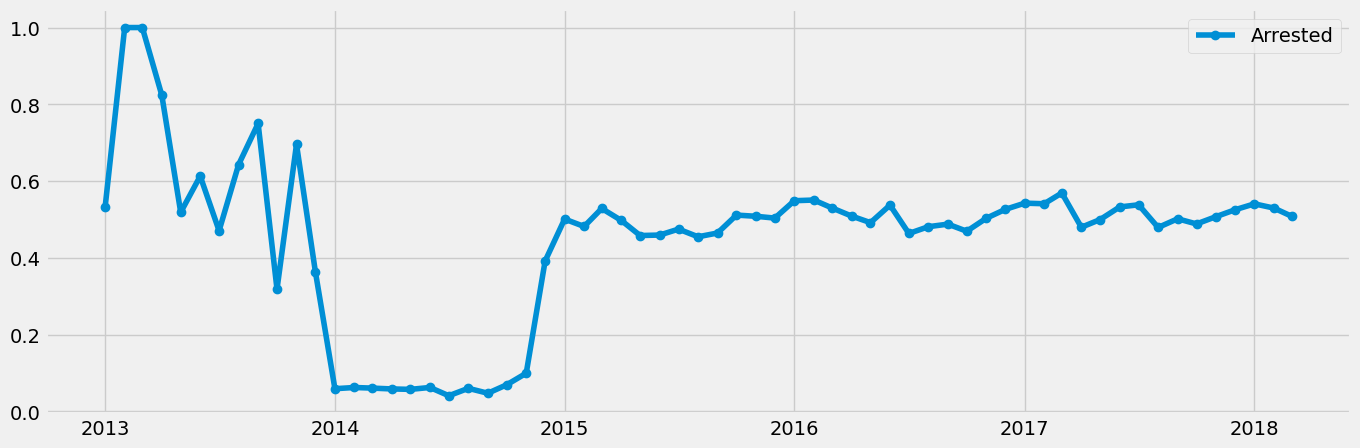

In [117]:
# Plot the data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_arrested, marker='o', linestyle='-', label='Arrested')
plt.legend()
plt.show()

In [119]:
# Conduct a Dickey-Fuller test to check for stationarity
dickey_fuller(df_arrested['n_arrested'])

Dickey-Fuller Stationarity Test:
Test Statistic                 -2.795421
p-value                         0.058931
Number of Lags Used             3.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


##### It is non_stationary

In [149]:
df_diff = df_arrested - df_arrested.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [151]:
df_diff.dropna(inplace = True)

In [155]:
df_diff.drop(['n_arrested'], axis=1, inplace=True) # Drop the "date" column
df_diff.head()

,n_arrested_diff
datetime,
2013-03-01,-0.466667
2013-04-01,-0.176471
2013-05-01,-0.128540
2013-06-01,0.399396
2013-07-01,-0.236700


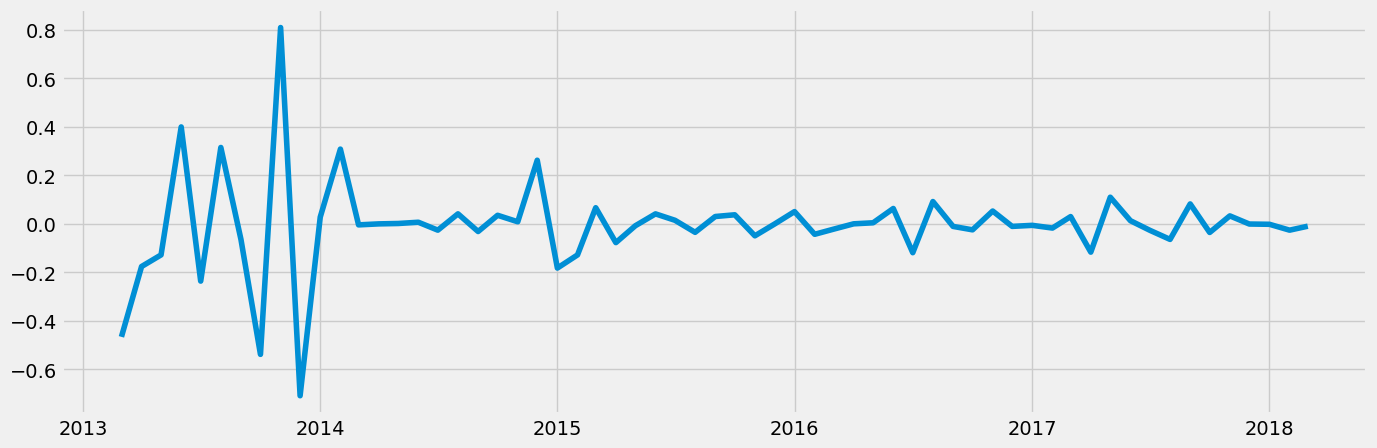

In [157]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [159]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity Test:
Test Statistic                 -3.030009
p-value                         0.032185
Number of Lags Used            11.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


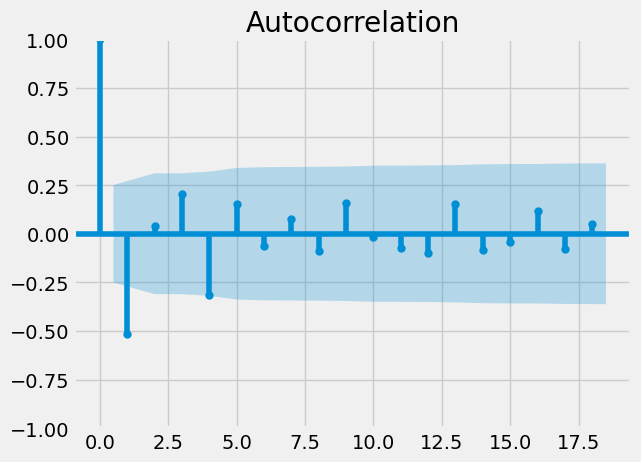

In [163]:
plot_acf(df_diff)
plt.show()

#### 3.4 Time series analysis decomposition "n_suspects"

In [167]:
df_suspects.head()

,year_month,n_suspects
0,2013-01-01,1.066667
1,2013-02-01,1.500000
2,2013-03-01,1.421053
3,2013-04-01,1.235294
4,2013-05-01,1.148148


In [170]:
# Set the "year_month" column as the index
df_suspects['datetime'] = pd.to_datetime(df_suspects['year_month']) # Create a datetime column from "date"
df_suspects = df_suspects.set_index('datetime') # Set the datetime as the index of the dataframe
df_suspects.drop(['year_month'], axis=1, inplace=True) # Drop the "date" column
df_suspects.head()

,n_suspects
datetime,
2013-01-01,1.066667
2013-02-01,1.500000
2013-03-01,1.421053
2013-04-01,1.235294
2013-05-01,1.148148


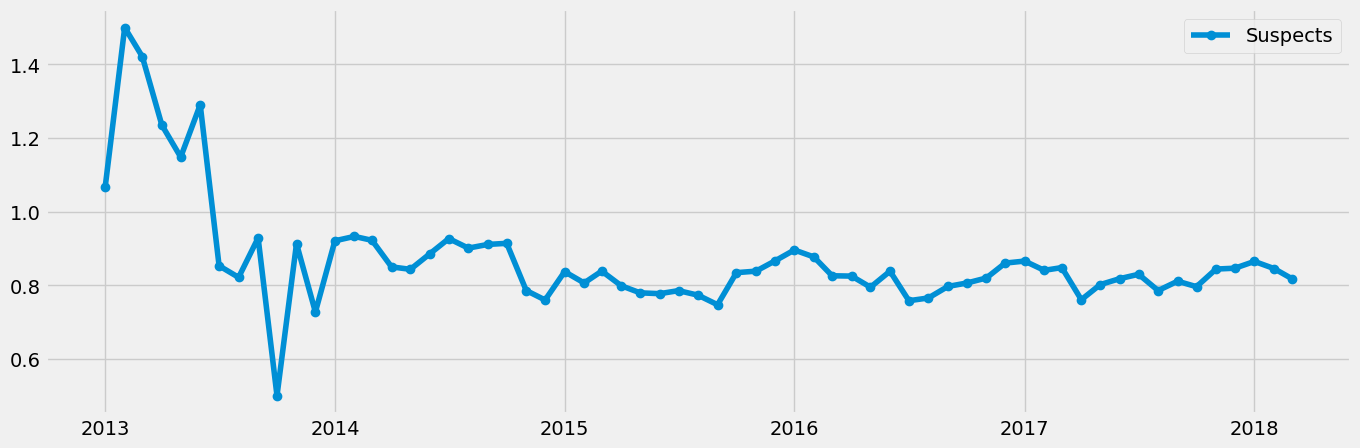

In [174]:
# Plot the data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_suspects, marker='o', linestyle='-', label='Suspects')
plt.legend()
plt.show()

In [176]:
# Conduct a Dickey-Fuller test to check for stationarity
dickey_fuller(df_suspects['n_suspects'])

Dickey-Fuller Stationarity Test:
Test Statistic                 -5.427495
p-value                         0.000003
Number of Lags Used             2.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


##### The time series is stationary

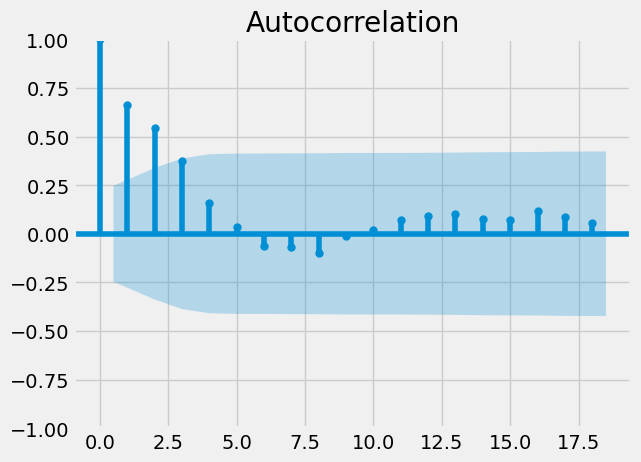

In [179]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here to import the autocorrelation and partial correlation plots

plot_acf(df_suspects)
plt.show()